In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
plt.rcParams["figure.figsize"] = (10,8)

- Due to Unsymmetry in dataset the data counter is not converse due to which it is difficult for model to predict good result.
- This Uneven data reduce the accuracy and increase validation loss.

In [4]:
df = pd.read_csv("Dataset/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df[["Age","EstimatedSalary","Purchased"]]

In [7]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


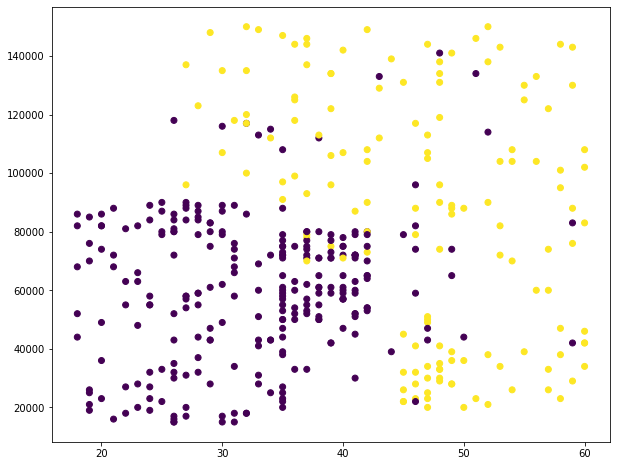

In [20]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,-1]);

## Without Standardscaling Data

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=124)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [11]:
# Creadting ANN Model
model = Sequential()

model.add(Dense(10, input_dim=2,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(metrics=["accuracy"], loss="binary_crossentropy",optimizer="adam")

In [22]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100, verbose=2)

Epoch 1/100
10/10 - 0s - loss: 16.2543 - accuracy: 0.4906 - val_loss: 9.0114 - val_accuracy: 0.6250 - 119ms/epoch - 12ms/step
Epoch 2/100
10/10 - 0s - loss: 4.0810 - accuracy: 0.5781 - val_loss: 8.7202 - val_accuracy: 0.6250 - 68ms/epoch - 7ms/step
Epoch 3/100
10/10 - 0s - loss: 17.2864 - accuracy: 0.4531 - val_loss: 8.3384 - val_accuracy: 0.6250 - 64ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 15.5614 - accuracy: 0.5688 - val_loss: 22.0248 - val_accuracy: 0.3500 - 70ms/epoch - 7ms/step
Epoch 5/100
10/10 - 0s - loss: 15.0329 - accuracy: 0.4844 - val_loss: 9.1481 - val_accuracy: 0.6250 - 69ms/epoch - 7ms/step
Epoch 6/100
10/10 - 0s - loss: 6.1087 - accuracy: 0.5594 - val_loss: 9.8871 - val_accuracy: 0.3125 - 67ms/epoch - 7ms/step
Epoch 7/100
10/10 - 0s - loss: 10.8999 - accuracy: 0.5281 - val_loss: 35.3180 - val_accuracy: 0.3750 - 66ms/epoch - 7ms/step
Epoch 8/100
10/10 - 0s - loss: 22.5636 - accuracy: 0.4938 - val_loss: 10.3972 - val_accuracy: 0.6250 - 69ms/epoch - 7ms/step
Epoch

Epoch 67/100
10/10 - 0s - loss: 20.7236 - accuracy: 0.5344 - val_loss: 20.6206 - val_accuracy: 0.6250 - 72ms/epoch - 7ms/step
Epoch 68/100
10/10 - 0s - loss: 19.9842 - accuracy: 0.4531 - val_loss: 22.6691 - val_accuracy: 0.3750 - 60ms/epoch - 6ms/step
Epoch 69/100
10/10 - 0s - loss: 16.1790 - accuracy: 0.4594 - val_loss: 3.1331 - val_accuracy: 0.5250 - 62ms/epoch - 6ms/step
Epoch 70/100
10/10 - 0s - loss: 7.0457 - accuracy: 0.5469 - val_loss: 3.1457 - val_accuracy: 0.6250 - 74ms/epoch - 7ms/step
Epoch 71/100
10/10 - 0s - loss: 9.6603 - accuracy: 0.5188 - val_loss: 9.4555 - val_accuracy: 0.3125 - 63ms/epoch - 6ms/step
Epoch 72/100
10/10 - 0s - loss: 18.2102 - accuracy: 0.4812 - val_loss: 23.1820 - val_accuracy: 0.6250 - 59ms/epoch - 6ms/step
Epoch 73/100
10/10 - 0s - loss: 21.9990 - accuracy: 0.4938 - val_loss: 38.6887 - val_accuracy: 0.3750 - 65ms/epoch - 6ms/step
Epoch 74/100
10/10 - 0s - loss: 31.1409 - accuracy: 0.5094 - val_loss: 37.0196 - val_accuracy: 0.3750 - 65ms/epoch - 7ms/st

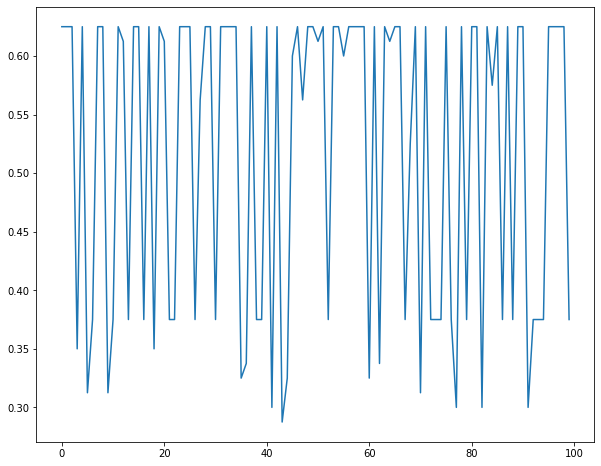

In [23]:
# Ploting Val_accuracy
plt.plot(history.history['val_accuracy'])

- Observations:
    1. Due to Unscale data Our ANN model have difficulty to converse the model to full accuracy
    2. Standard scaling will solve this problem
    3. It will bring entire data into same range due to which it will normalised the data and give better accuracy

## With Standard Scaling 

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [25]:
# Standard scaling the data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [27]:
# Building same model with standard scaled data

model1 = Sequential()

model1.add(Dense(10, input_dim=2, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model1.fit(X_train_sc,y_train,validation_data=(X_test_sc, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.7854 - accuracy: 0.6469 - val_loss: 0.8016 - val_accuracy: 0.6250
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7634 - accuracy: 0.6469 - val_loss: 0.7783 - val_accuracy: 0.6250
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7425 - accuracy: 0.6406 - val_loss: 0.7558 - val_accuracy: 0.6250
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7215 - accuracy: 0.6406 - val_loss: 0.7353 - val_accuracy: 0.6250
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7027 - accuracy: 0.6406 - val_loss: 0.7152 - val_accuracy: 0.6250
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.6344 - val_loss: 0.6960 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6672 - accuracy: 0.6313 - val_loss: 0.6779 - val_accuracy: 0.6000
Epoch 8/100

Epoch 59/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3249 - accuracy: 0.8750 - val_loss: 0.3116 - val_accuracy: 0.8625
Epoch 60/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8750 - val_loss: 0.3097 - val_accuracy: 0.8500
Epoch 61/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3215 - accuracy: 0.8781 - val_loss: 0.3077 - val_accuracy: 0.8500
Epoch 62/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3196 - accuracy: 0.8750 - val_loss: 0.3062 - val_accuracy: 0.8500
Epoch 63/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3181 - accuracy: 0.8750 - val_loss: 0.3044 - val_accuracy: 0.8500
Epoch 64/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8781 - val_loss: 0.3026 - val_accuracy: 0.8500
Epoch 65/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3150 - accuracy: 0.8781 - val_loss: 0.3006 - val_accuracy: 0.8500
Epoch 

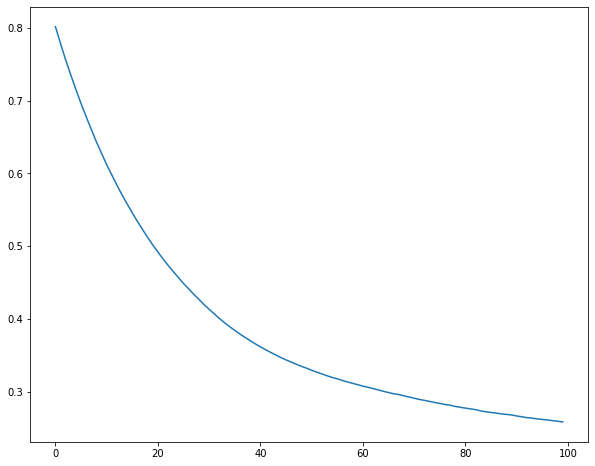

In [29]:
# Plotting val_loss

plt.plot(history.history["val_loss"])

- Observations:
    1. After Standard scaling the dataset our validation loss reduce in converse way and model perform well

In [30]:
# Ploting Graph
from mlxtend.plotting import plot_decision_regions

12960/12960 [==============================] - 23s 2ms/step


<AxesSubplot:>

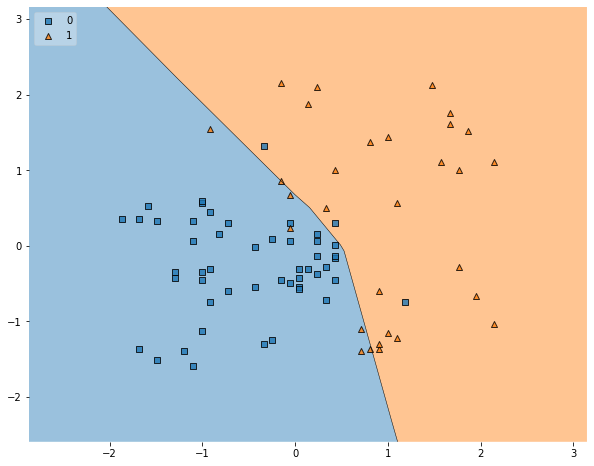

In [34]:
plot_decision_regions(X_test_sc, y_test.values,clf=model1, legend=2)